<a href="https://colab.research.google.com/github/tawfiqahmad88/tawfiqahmad88/blob/main/proje_sunumu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First What is BERT?**
BERT stands for Bidirectional Encoder Representations from Transformers. The name itself gives us several clues to what BERT is all about.

BERT architecture consists of several Transformer encoders stacked together. Each Transformer encoder encapsulates two sub-layers: a self-attention layer and a feed-forward layer.

**There are two different BERT models:**

**BERT base**, which is a BERT model consists of 12 layers of Transformer encoder, 12 attention heads, 768 hidden size, and 110M parameters.

**BERT large**, which is a BERT model consists of 24 layers of Transformer encoder,16 attention heads, 1024 hidden size, and 340 parameters.

BERT Input and Output BERT model expects a sequence of tokens (words) as an input. In each sequence of tokens, there are two special tokens that BERT would expect as an input:

**[CLS]:** This is the first token of every sequence, which stands for classification token.

**[SEP]:** This is the token that makes BERT know which token belongs to which 



sequence. This special token is mainly important for a next sentence prediction 



task or question-answering task. If we only have one sequence, then this token will be appended to the end of the sequence.
It is also important to note that the maximum size of tokens that can be fed into BERT model is 512. If the tokens in a sequence are less than 512, we can use padding to fill the unused token slots with [PAD] token. If the tokens in a sequence are longer than 512, then we need to do a truncation.

And that’s all that BERT expects as input.

BERT model then will output an embedding vector of size 768 in each of the tokens. We can use these vectors as an input for different kinds of NLP applications, whether it is text classification, next sentence prediction, Named-Entity-Recognition (NER), or question-answering.

For a text classification task, we focus our attention on the embedding vector output from the special [CLS] token. This means that we’re going to use the embedding vector of size 768 from [CLS] token as an input for our classifier, which then will output a vector of size the number of classes in our classification task.

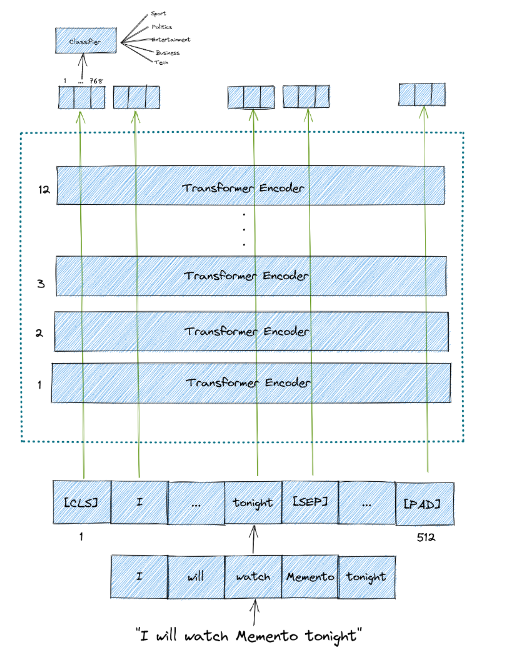

In [1]:
!pip install transformers[sentencepiece] datasets sacrebleu rouge_score py7zr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.3 MB/s eta 0:00:0

In [2]:
from transformers import pipeline, set_seed

import matplotlib.pyplot as plt

import pandas as pd
from datasets import load_dataset, load_metric
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import sent_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", version="3.0.0")

print(f"Features in cnn_dailymail : {dataset['train'].column_names}")

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/cnn_dailymail/default/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Features in cnn_dailymail : ['article', 'highlights', 'id']


In [4]:
sample = dataset["train"][1]
print(f"""
Article (excerpt of 500 characters, total length: {len(sample["article"])}):
""")
print(sample["article"][:500])
print(f'\nSummary (length: {len(sample["highlights"])}):')
print(sample["highlights"])


Article (excerpt of 500 characters, total length: 4051):

Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most s

Summary (length: 281):
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .


**Text Summarization Pipelines**

In [5]:
sample_text = dataset["train"][1]["article"][:1000]

# We'll collect the generated summaries of each model in a dictionary
summaries = {}

**Summarization Baseline**

In [6]:
def baseline_summary_three_sent(text):
    return "\n".join(sent_tokenize(text)[:3])

In [7]:
summaries['baseline'] = baseline_summary_three_sent(sample_text)

summaries['baseline']

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.\nHere, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.\nMIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."'

**huggingface pipeline**

The pipelines are a great and easy way to use models for inference.

Stating ”summarization”: will return a SummarizationPipeline

”text-generation”: will return a TextGenerationPipeline

**GPT-2**

We can use GPT-2 it to generate summaries by simply appending “TL;DR” at the end of the input text.

The expression “TL;DR” (too long; didn’t read) is often used on platforms like Reddit to indicate a short version of a long post. We will start our summarization experiment by re-creating the procedure of the original paper with the pipeline() function from Transformers

We create a text generation pipeline and load the GPT-2 model:

In [8]:
from transformers import pipeline, set_seed

set_seed(42)

pipe = pipeline('text-generation', model = 'gpt2-medium' )

gpt2_query = sample_text + "\nTL;DR:\n"

pipe_out = pipe(gpt2_query, max_length = 512, clean_up_tokenization_spaces = True)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1219: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [9]:
pipe_out

[{'generated_text': 'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and

In [10]:
pipe_out[0]["generated_text"][len(gpt2_query) :]

'Sued for his own death by state psychiatrists, Steven Leifman was arrested for threatening to kill people and charged with "using and placing a dangerous substance that can result in death."'

In [13]:
summaries['gpt2'] = "\n".join(sent_tokenize(pipe_out[0]["generated_text"][len(gpt2_query) :]))

**BART**

BART is a denoising autoencoder for pretraining sequence-to-sequence models. It is trained by (1) corrupting text with an arbitrary noising function, and (2) learning a model to reconstruct the original text. It uses a standard Transformer-based neural machine translation architecture.

That means, It uses a standard seq2seq/NMT architecture with a bidirectional encoder (like BERT) and a left-to-right decoder (like GPT). This means the encoder's attention mask is fully visible, like BERT, and the decoder's attention mask is causal, like GPT2.

This means that a fine-tuned BART model can take a text sequence (for example, English) as input and produce a different text sequence at the output (for example, French).

This type of model is relevant for machine translation, question-answering , text summarization, or sequence classification (categorizing input text sentences or tokens).

Another task is sentence entailment which, given two or more sentences, evaluates whether the sentences are logical extensions or are logically related to a given statement.

In [14]:
pipe = pipeline("summarization", model="facebook/bart-large-cnn")
pipe_out = pipe(sample_text)

In [15]:
pipe_out

[{'summary_text': 'Miami-Dade pretrial detention facility is dubbed the "forgotten floor" Here, inmates with the most severe mental illnesses are incarcerated. Most often, they face drug charges or charges of assaulting an officer. Judge Steven Leifman says the arrests often result from confrontations with police.'}]

In [16]:
summaries["bart"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

In [17]:
summaries["bart"]

'Miami-Dade pretrial detention facility is dubbed the "forgotten floor" Here, inmates with the most severe mental illnesses are incarcerated.\nMost often, they face drug charges or charges of assaulting an officer.\nJudge Steven Leifman says the arrests often result from confrontations with police.'

**PEGASUS**

The PEGASUS model’s pre-training task is very similar to summarization, i.e. important sentences are removed and masked from an input document and are later generated together as one output sequence from the remaining sentences, which is fairly similar to a summary. In PEGASUS, several whole sentences are removed from documents during pre-training, and the model is tasked with recovering them. The Input for such pre-training is a document with missing sentences, while the output consists of the missing sentences being concatenated together. The advantage of this self-supervision is that you can create as many examples as there are documents without any human intervention, which often becomes a bottleneck problem in purely supervised systems.

In [18]:
pipe = pipeline('summarization', model="google/pegasus-cnn_dailymail"  )

pipe_out = pipe(sample_text)

In [19]:
pipe_out

[{'summary_text': 'Mentally ill inmates are housed on the "forgotten floor" of a Miami jail .<n>Judge Steven Leifman says the charges are usually "avoidable felonies"<n>He says the arrests often result from confrontations with police .<n>Mentally ill people often won\'t do what they\'re told when police arrive on the scene .'}]

In [20]:
summaries["pegasus"] = pipe_out[0]["summary_text"].replace(" .<n>", ".\n")

In [21]:
print("GROUND TRUTH")

print(dataset['train'][1]['highlights'])


for model_name in summaries:
    print(model_name.upper())
    print(summaries[model_name])

GROUND TRUTH
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .
BASELINE
Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.
Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.
MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."
GPT2
Sued for his own death by state psychiatrists, Steven Leifman was arrested for threatening to kill people and charged with "using and placing a dangerous substance that can result in death."
BART
Miami-Dade pretrial dete

**SacreBLEU**

The bleu_metric object is an instance of the Metric class, and works like an aggregator: you can add single instances with add() or whole batches via add_batch(). Once you have added all the samples you need to evaluate, you then call compute() and the metric is calculated. This returns a dictionary with several values, such as the precision for each n-gram, the length penalty, as well as the final BLEU score. Let’s look at the example from before:

In [22]:
from datasets import load_metric

bleu_metric = load_metric("sacrebleu")

<ipython-input-22-eacc06f6d0e4>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleu_metric = load_metric("sacrebleu")


In [23]:
bleu_metric.add(prediction = [summaries["pegasus"]], reference = [dataset['train'][1]['highlights'] ])

results = bleu_metric.compute(smooth_method = 'floor', smooth_value = 0 )

results['precision'] = [np.round(p , 2) for p in results['precisions'] ]

pd.DataFrame.from_dict(results, orient = 'index', columns = ['Value'] )

,Value
score,18.73841
counts,"[27, 14, 10, 6]"
totals,"[67, 66, 65, 64]"
precisions,"[40.298507462686565, 21.21212121212121, 15.384..."
bp,1.0
sys_len,67
ref_len,57
precision,"[40.3, 21.21, 15.38, 9.38]"
